In [1]:
import numpy as np
import sklearn
import matplotlib as mpl
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from keras.utils import to_categorical
import time

Using TensorFlow backend.
c:\users\nathaniel\pycharmprojects\cs4341\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nathaniel\pycharmprojects\cs4341\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nathaniel\pycharmprojects\cs4341\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\natha

In [2]:
images = np.load('images.npy')
labels = np.load('labels.npy')

6

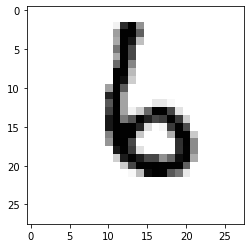

In [3]:

plt.imshow(images[0], cmap=mpl.cm.binary)
print(labels[0])

In [4]:
images_flatten = np.array([image.flatten() for image in images])
outputs = to_categorical(labels)

In [12]:

batch_size = 512
nodes = 50
epochs = 500
learn_rate = 0.001
hidden_layers = 10


In [13]:
model = Sequential()
model.add(Dense(nodes, activation='relu', input_shape=images_flatten[0].shape))

for i in range(0, hidden_layers):
    
    model.add(Dense(nodes, activation='relu'))
    
model.add(Dense(len(outputs[0]), activation='softmax'))

In [14]:
sgd = keras.optimizers.SGD(lr=learn_rate, momentum=0.5, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', 'mse'])

In [15]:
x_train = images_flatten[:int(0.6*len(images_flatten))]
x_test = images_flatten[int(0.6*len(images_flatten)):int(0.8*len(images_flatten))]
x_validate = images_flatten[int(0.8*len(images_flatten)):len(images_flatten)]

y_train = outputs[:int(0.6*len(outputs))]
y_test = outputs[int(0.6*len(outputs)):int(0.8*len(outputs))]
y_validate = outputs[int(0.8*len(outputs)):len(outputs)]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

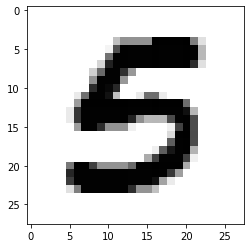

In [16]:

plt.imshow(x_train[10].reshape(28,28), cmap=mpl.cm.binary)
print(y_train[10])

In [17]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_validate, y_validate))

Train on 3900 samples, validate on 1300 samples
Epoch 1/500
3900/3900 [==============================] - 0s 104us/step - loss: 2.9366 - acc: 0.1403 - mean_squared_error: 0.0979 - val_loss: 2.3475 - val_acc: 0.1469 - val_mean_squared_error: 0.0904
Epoch 2/500
3900/3900 [==============================] - 0s 17us/step - loss: 2.3039 - acc: 0.1733 - mean_squared_error: 0.0896 - val_loss: 2.2439 - val_acc: 0.1877 - val_mean_squared_error: 0.0882
Epoch 3/500
3900/3900 [==============================] - 0s 17us/step - loss: 2.2276 - acc: 0.1990 - mean_squared_error: 0.0880 - val_loss: 2.1906 - val_acc: 0.2092 - val_mean_squared_error: 0.0870
Epoch 4/500
3900/3900 [==============================] - 0s 16us/step - loss: 2.1768 - acc: 0.2226 - mean_squared_error: 0.0868 - val_loss: 2.1438 - val_acc: 0.2362 - val_mean_squared_error: 0.0858
Epoch 5/500
3900/3900 [==============================] - 0s 18us/step - loss: 2.1309 - acc: 0.2479 - mean_squared_error: 0.0857 - val_loss: 2.0961 - val_acc: 0

Epoch 42/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.7111 - acc: 0.7636 - mean_squared_error: 0.0328 - val_loss: 0.7972 - val_acc: 0.7369 - val_mean_squared_error: 0.0367
Epoch 43/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.7022 - acc: 0.7700 - mean_squared_error: 0.0323 - val_loss: 0.8024 - val_acc: 0.7285 - val_mean_squared_error: 0.0370
Epoch 44/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.6884 - acc: 0.7723 - mean_squared_error: 0.0318 - val_loss: 0.8018 - val_acc: 0.7338 - val_mean_squared_error: 0.0368
Epoch 45/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.6797 - acc: 0.7751 - mean_squared_error: 0.0314 - val_loss: 0.7801 - val_acc: 0.7385 - val_mean_squared_error: 0.0360
Epoch 46/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.6637 - acc: 0.7846 - mean_squared_error: 0.0306 - val_loss: 0.7811 - val_acc: 0.7454 - val_mean_squared_error: 0.0358
Epoch

3900/3900 [==============================] - 0s 16us/step - loss: 0.3952 - acc: 0.8746 - mean_squared_error: 0.0183 - val_loss: 0.5834 - val_acc: 0.8115 - val_mean_squared_error: 0.0264
Epoch 84/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.3931 - acc: 0.8759 - mean_squared_error: 0.0184 - val_loss: 0.5825 - val_acc: 0.8123 - val_mean_squared_error: 0.0262
Epoch 85/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.3875 - acc: 0.8810 - mean_squared_error: 0.0180 - val_loss: 0.5844 - val_acc: 0.8100 - val_mean_squared_error: 0.0266
Epoch 86/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.3856 - acc: 0.8797 - mean_squared_error: 0.0180 - val_loss: 0.5828 - val_acc: 0.8138 - val_mean_squared_error: 0.0264
Epoch 87/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.3792 - acc: 0.8818 - mean_squared_error: 0.0176 - val_loss: 0.5876 - val_acc: 0.8108 - val_mean_squared_error: 0.0265
Epoch 88/500
3900/

Epoch 124/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.2610 - acc: 0.9226 - mean_squared_error: 0.0121 - val_loss: 0.5235 - val_acc: 0.8385 - val_mean_squared_error: 0.0232
Epoch 125/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.2569 - acc: 0.9228 - mean_squared_error: 0.0119 - val_loss: 0.5233 - val_acc: 0.8415 - val_mean_squared_error: 0.0230
Epoch 126/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.2570 - acc: 0.9262 - mean_squared_error: 0.0118 - val_loss: 0.5186 - val_acc: 0.8385 - val_mean_squared_error: 0.0232
Epoch 127/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.2545 - acc: 0.9238 - mean_squared_error: 0.0118 - val_loss: 0.5198 - val_acc: 0.8408 - val_mean_squared_error: 0.0230
Epoch 128/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.2525 - acc: 0.9254 - mean_squared_error: 0.0117 - val_loss: 0.5245 - val_acc: 0.8392 - val_mean_squared_error: 0.0232


Epoch 165/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.1785 - acc: 0.9508 - mean_squared_error: 0.0081 - val_loss: 0.5094 - val_acc: 0.8569 - val_mean_squared_error: 0.0218
Epoch 166/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.1795 - acc: 0.9485 - mean_squared_error: 0.0082 - val_loss: 0.5012 - val_acc: 0.8554 - val_mean_squared_error: 0.0214
Epoch 167/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.1750 - acc: 0.9503 - mean_squared_error: 0.0079 - val_loss: 0.5046 - val_acc: 0.8585 - val_mean_squared_error: 0.0216
Epoch 168/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.1783 - acc: 0.9469 - mean_squared_error: 0.0082 - val_loss: 0.5064 - val_acc: 0.8562 - val_mean_squared_error: 0.0215
Epoch 169/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.1752 - acc: 0.9518 - mean_squared_error: 0.0080 - val_loss: 0.5155 - val_acc: 0.8531 - val_mean_squared_error: 0.0217


Epoch 206/500
3900/3900 [==============================] - 0s 17us/step - loss: 0.1271 - acc: 0.9667 - mean_squared_error: 0.0056 - val_loss: 0.5063 - val_acc: 0.8600 - val_mean_squared_error: 0.0207
Epoch 207/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.1250 - acc: 0.9667 - mean_squared_error: 0.0055 - val_loss: 0.5082 - val_acc: 0.8600 - val_mean_squared_error: 0.0208
Epoch 208/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.1249 - acc: 0.9654 - mean_squared_error: 0.0055 - val_loss: 0.5092 - val_acc: 0.8623 - val_mean_squared_error: 0.0210
Epoch 209/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.1245 - acc: 0.9672 - mean_squared_error: 0.0055 - val_loss: 0.5099 - val_acc: 0.8592 - val_mean_squared_error: 0.0209
Epoch 210/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.1228 - acc: 0.9687 - mean_squared_error: 0.0054 - val_loss: 0.5051 - val_acc: 0.8638 - val_mean_squared_error: 0.0207


Epoch 247/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0901 - acc: 0.9792 - mean_squared_error: 0.0037 - val_loss: 0.5173 - val_acc: 0.8708 - val_mean_squared_error: 0.0202
Epoch 248/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.0889 - acc: 0.9792 - mean_squared_error: 0.0036 - val_loss: 0.5179 - val_acc: 0.8677 - val_mean_squared_error: 0.0202
Epoch 249/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.0878 - acc: 0.9803 - mean_squared_error: 0.0036 - val_loss: 0.5220 - val_acc: 0.8685 - val_mean_squared_error: 0.0202
Epoch 250/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0881 - acc: 0.9800 - mean_squared_error: 0.0036 - val_loss: 0.5187 - val_acc: 0.8677 - val_mean_squared_error: 0.0203
Epoch 251/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0873 - acc: 0.9797 - mean_squared_error: 0.0036 - val_loss: 0.5208 - val_acc: 0.8715 - val_mean_squared_error: 0.0202


Epoch 288/500
3900/3900 [==============================] - 0s 21us/step - loss: 0.0655 - acc: 0.9864 - mean_squared_error: 0.0025 - val_loss: 0.5355 - val_acc: 0.8738 - val_mean_squared_error: 0.0198
Epoch 289/500
3900/3900 [==============================] - 0s 18us/step - loss: 0.0653 - acc: 0.9882 - mean_squared_error: 0.0025 - val_loss: 0.5367 - val_acc: 0.8769 - val_mean_squared_error: 0.0197
Epoch 290/500
3900/3900 [==============================] - 0s 18us/step - loss: 0.0645 - acc: 0.9872 - mean_squared_error: 0.0025 - val_loss: 0.5368 - val_acc: 0.8738 - val_mean_squared_error: 0.0199
Epoch 291/500
3900/3900 [==============================] - 0s 20us/step - loss: 0.0637 - acc: 0.9872 - mean_squared_error: 0.0024 - val_loss: 0.5404 - val_acc: 0.8692 - val_mean_squared_error: 0.0202
Epoch 292/500
3900/3900 [==============================] - 0s 24us/step - loss: 0.0633 - acc: 0.9872 - mean_squared_error: 0.0024 - val_loss: 0.5394 - val_acc: 0.8723 - val_mean_squared_error: 0.0202


Epoch 329/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0480 - acc: 0.9926 - mean_squared_error: 0.0017 - val_loss: 0.5632 - val_acc: 0.8754 - val_mean_squared_error: 0.0203
Epoch 330/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0482 - acc: 0.9928 - mean_squared_error: 0.0017 - val_loss: 0.5570 - val_acc: 0.8754 - val_mean_squared_error: 0.0199
Epoch 331/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0482 - acc: 0.9921 - mean_squared_error: 0.0017 - val_loss: 0.5560 - val_acc: 0.8746 - val_mean_squared_error: 0.0198
Epoch 332/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0471 - acc: 0.9923 - mean_squared_error: 0.0017 - val_loss: 0.5575 - val_acc: 0.8769 - val_mean_squared_error: 0.0197
Epoch 333/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0463 - acc: 0.9928 - mean_squared_error: 0.0016 - val_loss: 0.5598 - val_acc: 0.8785 - val_mean_squared_error: 0.0197


Epoch 370/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.0363 - acc: 0.9946 - mean_squared_error: 0.0012 - val_loss: 0.5748 - val_acc: 0.8792 - val_mean_squared_error: 0.0198
Epoch 371/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.0357 - acc: 0.9949 - mean_squared_error: 0.0012 - val_loss: 0.5762 - val_acc: 0.8815 - val_mean_squared_error: 0.0198
Epoch 372/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.0355 - acc: 0.9949 - mean_squared_error: 0.0012 - val_loss: 0.5770 - val_acc: 0.8792 - val_mean_squared_error: 0.0198
Epoch 373/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.0352 - acc: 0.9946 - mean_squared_error: 0.0012 - val_loss: 0.5754 - val_acc: 0.8785 - val_mean_squared_error: 0.0198
Epoch 374/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0349 - acc: 0.9951 - mean_squared_error: 0.0011 - val_loss: 0.5743 - val_acc: 0.8808 - val_mean_squared_error: 0.0197


3900/3900 [==============================] - 0s 16us/step - loss: 0.0272 - acc: 0.9956 - mean_squared_error: 8.6198e-04 - val_loss: 0.5886 - val_acc: 0.8808 - val_mean_squared_error: 0.0195
Epoch 411/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0271 - acc: 0.9959 - mean_squared_error: 8.5478e-04 - val_loss: 0.5899 - val_acc: 0.8808 - val_mean_squared_error: 0.0196
Epoch 412/500
3900/3900 [==============================] - 0s 15us/step - loss: 0.0268 - acc: 0.9959 - mean_squared_error: 8.3552e-04 - val_loss: 0.5918 - val_acc: 0.8800 - val_mean_squared_error: 0.0197
Epoch 413/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0268 - acc: 0.9956 - mean_squared_error: 8.5152e-04 - val_loss: 0.5921 - val_acc: 0.8831 - val_mean_squared_error: 0.0195
Epoch 414/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0265 - acc: 0.9956 - mean_squared_error: 8.3592e-04 - val_loss: 0.5898 - val_acc: 0.8785 - val_mean_squared_error: 0

3900/3900 [==============================] - 0s 16us/step - loss: 0.0205 - acc: 0.9977 - mean_squared_error: 6.1081e-04 - val_loss: 0.6056 - val_acc: 0.8792 - val_mean_squared_error: 0.0198
Epoch 451/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0207 - acc: 0.9974 - mean_squared_error: 6.0789e-04 - val_loss: 0.6056 - val_acc: 0.8815 - val_mean_squared_error: 0.0196
Epoch 452/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0203 - acc: 0.9977 - mean_squared_error: 6.0306e-04 - val_loss: 0.6055 - val_acc: 0.8815 - val_mean_squared_error: 0.0196
Epoch 453/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0203 - acc: 0.9974 - mean_squared_error: 5.9995e-04 - val_loss: 0.6051 - val_acc: 0.8800 - val_mean_squared_error: 0.0196
Epoch 454/500
3900/3900 [==============================] - 0s 16us/step - loss: 0.0200 - acc: 0.9974 - mean_squared_error: 5.9178e-04 - val_loss: 0.6058 - val_acc: 0.8800 - val_mean_squared_error: 0

3900/3900 [==============================] - 0s 16us/step - loss: 0.0160 - acc: 0.9985 - mean_squared_error: 4.3947e-04 - val_loss: 0.6181 - val_acc: 0.8838 - val_mean_squared_error: 0.0196
Epoch 491/500
3900/3900 [==============================] - 0s 17us/step - loss: 0.0161 - acc: 0.9982 - mean_squared_error: 4.5072e-04 - val_loss: 0.6181 - val_acc: 0.8823 - val_mean_squared_error: 0.0197
Epoch 492/500
3900/3900 [==============================] - 0s 17us/step - loss: 0.0158 - acc: 0.9985 - mean_squared_error: 4.3796e-04 - val_loss: 0.6196 - val_acc: 0.8854 - val_mean_squared_error: 0.0196
Epoch 493/500
3900/3900 [==============================] - 0s 23us/step - loss: 0.0157 - acc: 0.9985 - mean_squared_error: 4.3289e-04 - val_loss: 0.6187 - val_acc: 0.8831 - val_mean_squared_error: 0.0197
Epoch 494/500
3900/3900 [==============================] - 0s 22us/step - loss: 0.0157 - acc: 0.9985 - mean_squared_error: 4.3511e-04 - val_loss: 0.6214 - val_acc: 0.8800 - val_mean_squared_error: 0

In [18]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'loss', 'acc', 'mean_squared_error'])

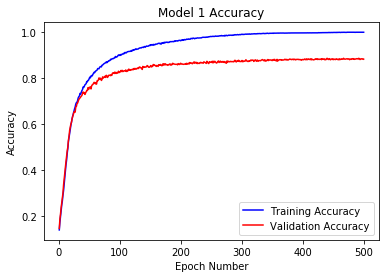

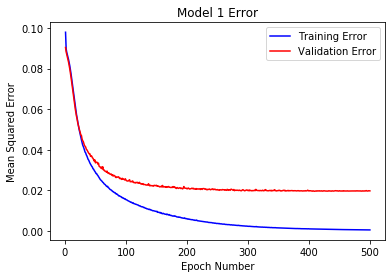

In [19]:


epoch_list = np.linspace(1,500, 500)
plt.plot(epoch_list, history.history['acc'], 'b-')
plt.plot(epoch_list, history.history['val_acc'], 'r-')

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Model 1 Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
# plt.savefig('m1acc_hiddenlayers{}.png'.format(hidden_layers))
plt.show()


plt.plot(epoch_list, history.history['mean_squared_error'], 'b-')
plt.plot(epoch_list, history.history['val_mean_squared_error'], 'r-')

plt.xlabel('Epoch Number')
plt.ylabel('Mean Squared Error')
plt.title('Model 1 Error')
plt.legend(['Training Error', 'Validation Error'])
# plt.savefig('m1err_hiddenlayers{}.png'.format(hidden_layers))
plt.show()



In [21]:
predictions = model.predict(x_test)

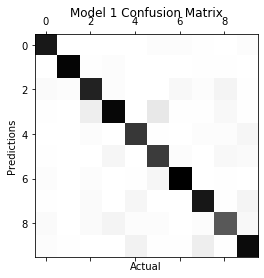

In [41]:

y_pred = predictions

conf_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.matshow(conf_mat, cmap=mpl.cm.binary)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Model 1 Confusion Matrix')
# plt.savefig('m1confmat_hiddenlayers{}_batch{}.png'.format(hidden_layers, batch_size))
plt.show()


In [182]:
model2 = Sequential()
model2.add(Dropout(0.2, input_shape=images_flatten[0].shape))
for i in range(0, hidden_layers):
    
    model2.add(Dense(nodes, activation='relu'))
    
model2.add(Dense(len(outputs[0]), activation='softmax'))

sgd = keras.optimizers.SGD(lr=learn_rate, momentum=0.5, nesterov=False)

model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', 'mse'])

x_train = images_flatten[:int(0.6*len(images_flatten))]
x_test = images_flatten[int(0.6*len(images_flatten)):int(0.8*len(images_flatten))]
x_validate = images_flatten[int(0.8*len(images_flatten)):len(images_flatten)]

y_train = outputs[:int(0.6*len(outputs))]
y_test = outputs[int(0.6*len(outputs)):int(0.8*len(outputs))]
y_validate = outputs[int(0.8*len(outputs)):len(outputs)]

history2 = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_validate, y_validate))


Train on 3900 samples, validate on 1300 samples
Epoch 1/500
3900/3900 [==============================] - 2s 455us/step - loss: 13.8788 - acc: 0.1295 - mean_squared_error: 0.1729 - val_loss: 13.5676 - val_acc: 0.1508 - val_mean_squared_error: 0.1681
Epoch 2/500
3900/3900 [==============================] - 0s 28us/step - loss: 12.9377 - acc: 0.1869 - mean_squared_error: 0.1611 - val_loss: 12.7588 - val_acc: 0.1954 - val_mean_squared_error: 0.1595
Epoch 3/500
3900/3900 [==============================] - 0s 29us/step - loss: 11.9444 - acc: 0.2428 - mean_squared_error: 0.1497 - val_loss: 11.0219 - val_acc: 0.3038 - val_mean_squared_error: 0.1380
Epoch 4/500
3900/3900 [==============================] - 0s 29us/step - loss: 10.8579 - acc: 0.3131 - mean_squared_error: 0.1359 - val_loss: 10.5229 - val_acc: 0.3377 - val_mean_squared_error: 0.1310
Epoch 5/500
3900/3900 [==============================] - 0s 28us/step - loss: 10.3790 - acc: 0.3474 - mean_squared_error: 0.1293 - val_loss: 10.3703 - 

Epoch 42/500
3900/3900 [==============================] - 0s 29us/step - loss: 6.9198 - acc: 0.5636 - mean_squared_error: 0.0865 - val_loss: 7.0258 - val_acc: 0.5577 - val_mean_squared_error: 0.0877
Epoch 43/500
3900/3900 [==============================] - 0s 27us/step - loss: 6.8933 - acc: 0.5649 - mean_squared_error: 0.0862 - val_loss: 7.0302 - val_acc: 0.5592 - val_mean_squared_error: 0.0874
Epoch 44/500
3900/3900 [==============================] - 0s 27us/step - loss: 6.8984 - acc: 0.5649 - mean_squared_error: 0.0863 - val_loss: 7.0715 - val_acc: 0.5531 - val_mean_squared_error: 0.0884
Epoch 45/500
3900/3900 [==============================] - 0s 27us/step - loss: 6.8721 - acc: 0.5656 - mean_squared_error: 0.0859 - val_loss: 6.9825 - val_acc: 0.5623 - val_mean_squared_error: 0.0870
Epoch 46/500
3900/3900 [==============================] - 0s 27us/step - loss: 6.8980 - acc: 0.5641 - mean_squared_error: 0.0864 - val_loss: 6.9905 - val_acc: 0.5638 - val_mean_squared_error: 0.0867
Epoch

3900/3900 [==============================] - 0s 32us/step - loss: 5.2977 - acc: 0.6638 - mean_squared_error: 0.0666 - val_loss: 5.6956 - val_acc: 0.6400 - val_mean_squared_error: 0.0715
Epoch 125/500
3900/3900 [==============================] - 0s 29us/step - loss: 5.3568 - acc: 0.6600 - mean_squared_error: 0.0675 - val_loss: 5.5939 - val_acc: 0.6454 - val_mean_squared_error: 0.0704
Epoch 126/500
3900/3900 [==============================] - 0s 30us/step - loss: 5.2932 - acc: 0.6649 - mean_squared_error: 0.0665 - val_loss: 5.6367 - val_acc: 0.6408 - val_mean_squared_error: 0.0712
Epoch 127/500
3900/3900 [==============================] - 0s 30us/step - loss: 5.2964 - acc: 0.6659 - mean_squared_error: 0.0663 - val_loss: 5.6356 - val_acc: 0.6446 - val_mean_squared_error: 0.0706
Epoch 128/500
3900/3900 [==============================] - 0s 29us/step - loss: 5.3435 - acc: 0.6631 - mean_squared_error: 0.0669 - val_loss: 5.7084 - val_acc: 0.6385 - val_mean_squared_error: 0.0716
Epoch 129/500


3900/3900 [==============================] - 0s 36us/step - loss: 5.1631 - acc: 0.6741 - mean_squared_error: 0.0647 - val_loss: 5.5616 - val_acc: 0.6477 - val_mean_squared_error: 0.0701
Epoch 166/500
3900/3900 [==============================] - 0s 33us/step - loss: 5.2023 - acc: 0.6721 - mean_squared_error: 0.0652 - val_loss: 5.5213 - val_acc: 0.6485 - val_mean_squared_error: 0.0696
Epoch 167/500
3900/3900 [==============================] - 0s 31us/step - loss: 5.1724 - acc: 0.6731 - mean_squared_error: 0.0648 - val_loss: 5.5383 - val_acc: 0.6485 - val_mean_squared_error: 0.0696
Epoch 168/500
3900/3900 [==============================] - 0s 31us/step - loss: 5.1661 - acc: 0.6736 - mean_squared_error: 0.0647 - val_loss: 5.5550 - val_acc: 0.6485 - val_mean_squared_error: 0.0699
Epoch 169/500
3900/3900 [==============================] - 0s 30us/step - loss: 5.1332 - acc: 0.6772 - mean_squared_error: 0.0641 - val_loss: 5.5506 - val_acc: 0.6485 - val_mean_squared_error: 0.0699
Epoch 170/500


3900/3900 [==============================] - 0s 29us/step - loss: 5.1152 - acc: 0.6764 - mean_squared_error: 0.0641 - val_loss: 5.4932 - val_acc: 0.6538 - val_mean_squared_error: 0.0688
Epoch 207/500
3900/3900 [==============================] - 0s 27us/step - loss: 5.0953 - acc: 0.6800 - mean_squared_error: 0.0635 - val_loss: 5.4739 - val_acc: 0.6538 - val_mean_squared_error: 0.0688
Epoch 208/500
3900/3900 [==============================] - 0s 28us/step - loss: 5.0815 - acc: 0.6805 - mean_squared_error: 0.0633 - val_loss: 5.4770 - val_acc: 0.6554 - val_mean_squared_error: 0.0685
Epoch 209/500
3900/3900 [==============================] - 0s 28us/step - loss: 5.0638 - acc: 0.6828 - mean_squared_error: 0.0630 - val_loss: 5.5570 - val_acc: 0.6500 - val_mean_squared_error: 0.0695
Epoch 210/500
3900/3900 [==============================] - 0s 28us/step - loss: 5.1027 - acc: 0.6800 - mean_squared_error: 0.0636 - val_loss: 5.5364 - val_acc: 0.6500 - val_mean_squared_error: 0.0695
Epoch 211/500


3900/3900 [==============================] - 0s 29us/step - loss: 3.8909 - acc: 0.7510 - mean_squared_error: 0.0493 - val_loss: 4.2285 - val_acc: 0.7292 - val_mean_squared_error: 0.0536
Epoch 248/500
3900/3900 [==============================] - 0s 31us/step - loss: 3.9859 - acc: 0.7446 - mean_squared_error: 0.0506 - val_loss: 4.1465 - val_acc: 0.7354 - val_mean_squared_error: 0.0523
Epoch 249/500
3900/3900 [==============================] - 0s 28us/step - loss: 3.8883 - acc: 0.7528 - mean_squared_error: 0.0491 - val_loss: 4.2161 - val_acc: 0.7323 - val_mean_squared_error: 0.0531
Epoch 250/500
3900/3900 [==============================] - 0s 29us/step - loss: 3.9047 - acc: 0.7510 - mean_squared_error: 0.0492 - val_loss: 4.1394 - val_acc: 0.7346 - val_mean_squared_error: 0.0526
Epoch 251/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.8852 - acc: 0.7508 - mean_squared_error: 0.0493 - val_loss: 4.1660 - val_acc: 0.7338 - val_mean_squared_error: 0.0527
Epoch 252/500


3900/3900 [==============================] - 0s 30us/step - loss: 3.6981 - acc: 0.7654 - mean_squared_error: 0.0463 - val_loss: 4.1494 - val_acc: 0.7362 - val_mean_squared_error: 0.0522
Epoch 289/500
3900/3900 [==============================] - 0s 30us/step - loss: 3.6051 - acc: 0.7713 - mean_squared_error: 0.0453 - val_loss: 4.0833 - val_acc: 0.7392 - val_mean_squared_error: 0.0514
Epoch 290/500
3900/3900 [==============================] - 0s 31us/step - loss: 3.5729 - acc: 0.7744 - mean_squared_error: 0.0448 - val_loss: 4.0579 - val_acc: 0.7423 - val_mean_squared_error: 0.0514
Epoch 291/500
3900/3900 [==============================] - 0s 29us/step - loss: 3.6722 - acc: 0.7667 - mean_squared_error: 0.0462 - val_loss: 4.1269 - val_acc: 0.7392 - val_mean_squared_error: 0.0517
Epoch 292/500
3900/3900 [==============================] - 0s 29us/step - loss: 3.6246 - acc: 0.7710 - mean_squared_error: 0.0454 - val_loss: 4.0493 - val_acc: 0.7408 - val_mean_squared_error: 0.0513
Epoch 293/500


3900/3900 [==============================] - 0s 28us/step - loss: 3.5749 - acc: 0.7746 - mean_squared_error: 0.0447 - val_loss: 4.0895 - val_acc: 0.7415 - val_mean_squared_error: 0.0513
Epoch 330/500
3900/3900 [==============================] - 0s 28us/step - loss: 3.6016 - acc: 0.7710 - mean_squared_error: 0.0454 - val_loss: 4.1307 - val_acc: 0.7385 - val_mean_squared_error: 0.0518
Epoch 331/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.5946 - acc: 0.7710 - mean_squared_error: 0.0453 - val_loss: 4.0965 - val_acc: 0.7400 - val_mean_squared_error: 0.0514
Epoch 332/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.5348 - acc: 0.7744 - mean_squared_error: 0.0445 - val_loss: 4.1107 - val_acc: 0.7408 - val_mean_squared_error: 0.0512
Epoch 333/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.5821 - acc: 0.7731 - mean_squared_error: 0.0450 - val_loss: 4.1042 - val_acc: 0.7400 - val_mean_squared_error: 0.0514
Epoch 334/500


3900/3900 [==============================] - 0s 28us/step - loss: 3.5097 - acc: 0.7779 - mean_squared_error: 0.0440 - val_loss: 4.0340 - val_acc: 0.7408 - val_mean_squared_error: 0.0514
Epoch 371/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.4790 - acc: 0.7800 - mean_squared_error: 0.0437 - val_loss: 4.0894 - val_acc: 0.7438 - val_mean_squared_error: 0.0509
Epoch 372/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.4911 - acc: 0.7790 - mean_squared_error: 0.0439 - val_loss: 4.0430 - val_acc: 0.7454 - val_mean_squared_error: 0.0506
Epoch 373/500
3900/3900 [==============================] - 0s 28us/step - loss: 3.4993 - acc: 0.7779 - mean_squared_error: 0.0440 - val_loss: 4.0390 - val_acc: 0.7462 - val_mean_squared_error: 0.0505
Epoch 374/500
3900/3900 [==============================] - 0s 30us/step - loss: 3.4816 - acc: 0.7805 - mean_squared_error: 0.0435 - val_loss: 4.0639 - val_acc: 0.7446 - val_mean_squared_error: 0.0506
Epoch 375/500


3900/3900 [==============================] - 0s 28us/step - loss: 3.5003 - acc: 0.7797 - mean_squared_error: 0.0438 - val_loss: 4.0168 - val_acc: 0.7446 - val_mean_squared_error: 0.0508
Epoch 412/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.4882 - acc: 0.7790 - mean_squared_error: 0.0437 - val_loss: 4.0348 - val_acc: 0.7415 - val_mean_squared_error: 0.0511
Epoch 413/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.4453 - acc: 0.7828 - mean_squared_error: 0.0431 - val_loss: 4.0257 - val_acc: 0.7438 - val_mean_squared_error: 0.0506
Epoch 414/500
3900/3900 [==============================] - 0s 26us/step - loss: 3.4681 - acc: 0.7800 - mean_squared_error: 0.0435 - val_loss: 4.0443 - val_acc: 0.7408 - val_mean_squared_error: 0.0514
Epoch 415/500
3900/3900 [==============================] - 0s 26us/step - loss: 3.4398 - acc: 0.7841 - mean_squared_error: 0.0429 - val_loss: 4.0329 - val_acc: 0.7438 - val_mean_squared_error: 0.0508
Epoch 416/500


3900/3900 [==============================] - 0s 28us/step - loss: 3.4176 - acc: 0.7856 - mean_squared_error: 0.0425 - val_loss: 3.9782 - val_acc: 0.7446 - val_mean_squared_error: 0.0505
Epoch 453/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.4488 - acc: 0.7833 - mean_squared_error: 0.0430 - val_loss: 3.9714 - val_acc: 0.7438 - val_mean_squared_error: 0.0507
Epoch 454/500
3900/3900 [==============================] - 0s 28us/step - loss: 3.4516 - acc: 0.7826 - mean_squared_error: 0.0432 - val_loss: 3.9989 - val_acc: 0.7446 - val_mean_squared_error: 0.0507
Epoch 455/500
3900/3900 [==============================] - 0s 28us/step - loss: 3.4498 - acc: 0.7823 - mean_squared_error: 0.0431 - val_loss: 4.0111 - val_acc: 0.7415 - val_mean_squared_error: 0.0512
Epoch 456/500
3900/3900 [==============================] - 0s 28us/step - loss: 3.4391 - acc: 0.7833 - mean_squared_error: 0.0429 - val_loss: 4.0152 - val_acc: 0.7423 - val_mean_squared_error: 0.0511
Epoch 457/500


3900/3900 [==============================] - 0s 29us/step - loss: 3.4349 - acc: 0.7836 - mean_squared_error: 0.0429 - val_loss: 4.0312 - val_acc: 0.7446 - val_mean_squared_error: 0.0508
Epoch 494/500
3900/3900 [==============================] - 0s 28us/step - loss: 3.4373 - acc: 0.7841 - mean_squared_error: 0.0428 - val_loss: 3.9923 - val_acc: 0.7438 - val_mean_squared_error: 0.0509
Epoch 495/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.4401 - acc: 0.7836 - mean_squared_error: 0.0429 - val_loss: 3.9827 - val_acc: 0.7415 - val_mean_squared_error: 0.0509
Epoch 496/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.4046 - acc: 0.7851 - mean_squared_error: 0.0424 - val_loss: 4.0143 - val_acc: 0.7438 - val_mean_squared_error: 0.0508
Epoch 497/500
3900/3900 [==============================] - 0s 27us/step - loss: 3.3992 - acc: 0.7867 - mean_squared_error: 0.0424 - val_loss: 4.0388 - val_acc: 0.7431 - val_mean_squared_error: 0.0509
Epoch 498/500


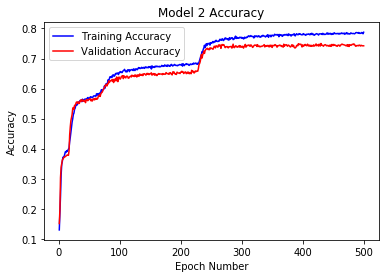

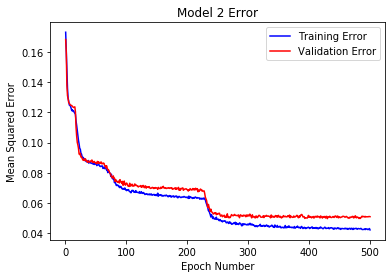

In [183]:

epoch_list = np.linspace(1,500, 500)
plt.plot(epoch_list, history2.history['acc'], 'b-')
plt.plot(epoch_list, history2.history['val_acc'], 'r-')

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Model 2 Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
# plt.savefig('m2acc_hiddenlayers{}.png'.format(hidden_layers))
plt.show()

plt.plot(epoch_list, history2.history['mean_squared_error'], 'b-')
plt.plot(epoch_list, history2.history['val_mean_squared_error'], 'r-')

plt.xlabel('Epoch Number')
plt.ylabel('Mean Squared Error')
plt.title('Model 2 Error')
plt.legend(['Training Error', 'Validation Error'])
# plt.savefig('m2err_hiddenlayers{}_batch{}.png'.format(hidden_layers, batch_size))
plt.show()

In [38]:


predictions2 = model2.predict(x_test)
y_pred2 = predictions2

conf_mat2 = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.matshow(conf_mat2, cmap=mpl.cm.binary)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Model 2 Confusion Matrix')
# plt.savefig('m2confmat_hiddenlayers{}_batch{}.png'.format(hidden_layers, batch_size))
plt.show()

NameError: name 'model2' is not defined

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([2.5751649e-12, 2.2977185e-09, 9.7355086e-01, 4.7033856e-05,
        6.6667476e-14, 9.3628005e-06, 2.6392754e-02, 9.1886161e-14,
        1.5115331e-23, 2.5459183e-14], dtype=float32))

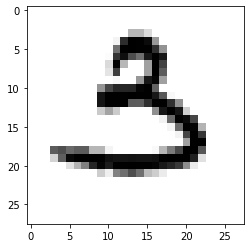

In [185]:
plt.imshow(x_test[11].reshape(28,28), cmap=mpl.cm.binary)
print(y_test[11], y_pred[11])

In [ ]:
# STOP

In [73]:
batch_size = 32
nodes = 50
epochs = 500
learn_rate = 0.001
hidden_layers = 10

In [74]:
model3 = Sequential()
model3.add(Dense(nodes, activation='relu', input_shape=images_flatten[0].shape))



for i in range(0, hidden_layers):
    
    model3.add(Dense(nodes, activation='relu'))
    
model3.add(Dense(len(outputs[0]), activation='softmax'))

sgd = keras.optimizers.SGD(lr=learn_rate, momentum=0.5, nesterov=False)

model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', 'mse'])

# x_train = images_flatten[:int(0.6*len(images_flatten))]
# x_test = images_flatten[int(0.6*len(images_flatten)):int(0.8*len(images_flatten))]
# x_validate = images_flatten[int(0.8*len(images_flatten)):len(images_flatten)]

# y_train = outputs[:int(0.6*len(outputs))]
# y_test = outputs[int(0.6*len(outputs)):int(0.8*len(outputs))]
# y_validate = outputs[int(0.8*len(outputs)):len(outputs)]

# history3 = model3.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_validate, y_validate))


In [75]:

def cross_validation_score(model=model3, x=images_flatten, y=outputs):
    
    size = len(x)
    #          train                          test                           validate
    splits = [[0, int(0.6*size),             int(0.6*size), int(0.8*size),   int(0.8*size), size],
              [int(0.2*size), int(0.8*size), int(0.8*size), size,            0, int(0.2*size)],
              [int(0.4*size), size,          0, int(0.2*size),               int(0.2*size), int(0.4*size)]]
    
    acc= []

    for split in splits:
        
        m = keras.models.clone_model(model3)
        sgd = keras.optimizers.SGD(lr=learn_rate, momentum=0.5, nesterov=False)
        m.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', 'mse'])
        
        x_train_fold = x[split[0]:split[1]]
        x_test_fold = x[split[2]:split[3]]
        x_val_fold = x[split[4]:split[5]]
        
        y_train_fold = y[split[0]:split[1]]
        y_test_fold = y[split[2]:split[3]]
        y_val_fold = y[split[4]:split[5]]
        
        history = m.fit(x_train_fold, y_train_fold, 
                        epochs=epochs, batch_size=batch_size, 
                        validation_data=(x_val_fold, y_val_fold))
        
        acc.append([history.history['acc'], history.history['val_acc']])
        
    return acc

In [76]:

cross_score = cross_validation_score()

Train on 3900 samples, validate on 1300 samples
Epoch 1/500
3900/3900 [==============================] - 2s 533us/step - loss: 2.4160 - acc: 0.1533 - mean_squared_error: 0.0914 - val_loss: 2.0650 - val_acc: 0.2808 - val_mean_squared_error: 0.0836
Epoch 2/500
3900/3900 [==============================] - 0s 116us/step - loss: 1.9023 - acc: 0.3505 - mean_squared_error: 0.0776 - val_loss: 1.4748 - val_acc: 0.5085 - val_mean_squared_error: 0.0631
Epoch 3/500
3900/3900 [==============================] - 0s 114us/step - loss: 1.4632 - acc: 0.5036 - mean_squared_error: 0.0624 - val_loss: 1.1430 - val_acc: 0.6054 - val_mean_squared_error: 0.0524
Epoch 4/500
3900/3900 [==============================] - 0s 114us/step - loss: 1.1599 - acc: 0.6126 - mean_squared_error: 0.0520 - val_loss: 0.8649 - val_acc: 0.7192 - val_mean_squared_error: 0.0403
Epoch 5/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.9550 - acc: 0.6885 - mean_squared_error: 0.0429 - val_loss: 0.7196 - val_ac

Epoch 42/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.2003 - acc: 0.9349 - mean_squared_error: 0.0096 - val_loss: 0.2433 - val_acc: 0.9354 - val_mean_squared_error: 0.0099
Epoch 43/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.1947 - acc: 0.9369 - mean_squared_error: 0.0092 - val_loss: 0.2471 - val_acc: 0.9369 - val_mean_squared_error: 0.0098
Epoch 44/500
3900/3900 [==============================] - 1s 132us/step - loss: 0.1941 - acc: 0.9367 - mean_squared_error: 0.0095 - val_loss: 0.2478 - val_acc: 0.9354 - val_mean_squared_error: 0.0098
Epoch 45/500
3900/3900 [==============================] - 1s 130us/step - loss: 0.1900 - acc: 0.9379 - mean_squared_error: 0.0091 - val_loss: 0.2551 - val_acc: 0.9338 - val_mean_squared_error: 0.0104
Epoch 46/500
3900/3900 [==============================] - 1s 132us/step - loss: 0.1958 - acc: 0.9369 - mean_squared_error: 0.0093 - val_loss: 0.2579 - val_acc: 0.9315 - val_mean_squared_error: 0.0105


Epoch 83/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.1181 - acc: 0.9656 - mean_squared_error: 0.0057 - val_loss: 0.2245 - val_acc: 0.9454 - val_mean_squared_error: 0.0087
Epoch 84/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.1021 - acc: 0.9685 - mean_squared_error: 0.0051 - val_loss: 0.2606 - val_acc: 0.9400 - val_mean_squared_error: 0.0095
Epoch 85/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.1188 - acc: 0.9636 - mean_squared_error: 0.0055 - val_loss: 0.2715 - val_acc: 0.9292 - val_mean_squared_error: 0.0107
Epoch 86/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0931 - acc: 0.9718 - mean_squared_error: 0.0045 - val_loss: 0.2457 - val_acc: 0.9462 - val_mean_squared_error: 0.0087
Epoch 87/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.1056 - acc: 0.9656 - mean_squared_error: 0.0053 - val_loss: 0.2639 - val_acc: 0.9362 - val_mean_squared_error: 0.0101


3900/3900 [==============================] - 0s 117us/step - loss: 0.0661 - acc: 0.9764 - mean_squared_error: 0.0035 - val_loss: 0.2527 - val_acc: 0.9485 - val_mean_squared_error: 0.0081
Epoch 124/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0569 - acc: 0.9808 - mean_squared_error: 0.0028 - val_loss: 0.2362 - val_acc: 0.9469 - val_mean_squared_error: 0.0085
Epoch 125/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0770 - acc: 0.9751 - mean_squared_error: 0.0039 - val_loss: 0.2483 - val_acc: 0.9538 - val_mean_squared_error: 0.0080
Epoch 126/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0662 - acc: 0.9774 - mean_squared_error: 0.0034 - val_loss: 0.2363 - val_acc: 0.9477 - val_mean_squared_error: 0.0082
Epoch 127/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0736 - acc: 0.9777 - mean_squared_error: 0.0037 - val_loss: 0.2582 - val_acc: 0.9446 - val_mean_squared_error: 0.0089
Epoch 128

Epoch 164/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0440 - acc: 0.9851 - mean_squared_error: 0.0022 - val_loss: 0.2603 - val_acc: 0.9515 - val_mean_squared_error: 0.0080
Epoch 165/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0429 - acc: 0.9872 - mean_squared_error: 0.0020 - val_loss: 0.2616 - val_acc: 0.9500 - val_mean_squared_error: 0.0082
Epoch 166/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0300 - acc: 0.9908 - mean_squared_error: 0.0015 - val_loss: 0.2698 - val_acc: 0.9477 - val_mean_squared_error: 0.0085
Epoch 167/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0373 - acc: 0.9862 - mean_squared_error: 0.0020 - val_loss: 0.2602 - val_acc: 0.9492 - val_mean_squared_error: 0.0083
Epoch 168/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0445 - acc: 0.9862 - mean_squared_error: 0.0022 - val_loss: 0.2457 - val_acc: 0.9515 - val_mean_squared_error: 0.

3900/3900 [==============================] - 0s 113us/step - loss: 0.0296 - acc: 0.9900 - mean_squared_error: 0.0015 - val_loss: 0.3021 - val_acc: 0.9469 - val_mean_squared_error: 0.0090
Epoch 205/500
3900/3900 [==============================] - 0s 111us/step - loss: 0.0477 - acc: 0.9846 - mean_squared_error: 0.0024 - val_loss: 0.2786 - val_acc: 0.9531 - val_mean_squared_error: 0.0081
Epoch 206/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0445 - acc: 0.9854 - mean_squared_error: 0.0022 - val_loss: 0.2803 - val_acc: 0.9485 - val_mean_squared_error: 0.0084
Epoch 207/500
3900/3900 [==============================] - 0s 111us/step - loss: 0.0324 - acc: 0.9885 - mean_squared_error: 0.0018 - val_loss: 0.2525 - val_acc: 0.9554 - val_mean_squared_error: 0.0075
Epoch 208/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0397 - acc: 0.9882 - mean_squared_error: 0.0019 - val_loss: 0.2517 - val_acc: 0.9531 - val_mean_squared_error: 0.0076
Epoch 209

3900/3900 [==============================] - 0s 118us/step - loss: 0.0259 - acc: 0.9941 - mean_squared_error: 0.0011 - val_loss: 0.2786 - val_acc: 0.9500 - val_mean_squared_error: 0.0080
Epoch 245/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0339 - acc: 0.9895 - mean_squared_error: 0.0016 - val_loss: 0.2697 - val_acc: 0.9546 - val_mean_squared_error: 0.0078
Epoch 246/500
3900/3900 [==============================] - 0s 121us/step - loss: 0.0340 - acc: 0.9879 - mean_squared_error: 0.0018 - val_loss: 0.2693 - val_acc: 0.9515 - val_mean_squared_error: 0.0080
Epoch 247/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0322 - acc: 0.9887 - mean_squared_error: 0.0017 - val_loss: 0.2946 - val_acc: 0.9485 - val_mean_squared_error: 0.0087
Epoch 248/500
3900/3900 [==============================] - 0s 123us/step - loss: 0.0292 - acc: 0.9905 - mean_squared_error: 0.0014 - val_loss: 0.2663 - val_acc: 0.9554 - val_mean_squared_error: 0.0077
Epoch 249

Epoch 285/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0243 - acc: 0.9944 - mean_squared_error: 0.0010 - val_loss: 0.2770 - val_acc: 0.9554 - val_mean_squared_error: 0.0074
Epoch 286/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0240 - acc: 0.9938 - mean_squared_error: 0.0010 - val_loss: 0.2755 - val_acc: 0.9531 - val_mean_squared_error: 0.0077
Epoch 287/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0184 - acc: 0.9941 - mean_squared_error: 9.6216e-04 - val_loss: 0.2607 - val_acc: 0.9515 - val_mean_squared_error: 0.0078
Epoch 288/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0193 - acc: 0.9928 - mean_squared_error: 0.0010 - val_loss: 0.2872 - val_acc: 0.9538 - val_mean_squared_error: 0.0080
Epoch 289/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0271 - acc: 0.9926 - mean_squared_error: 0.0012 - val_loss: 0.2853 - val_acc: 0.9531 - val_mean_squared_error

Epoch 325/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0140 - acc: 0.9956 - mean_squared_error: 7.4198e-04 - val_loss: 0.2820 - val_acc: 0.9500 - val_mean_squared_error: 0.0084
Epoch 326/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0169 - acc: 0.9946 - mean_squared_error: 8.3053e-04 - val_loss: 0.2830 - val_acc: 0.9523 - val_mean_squared_error: 0.0080
Epoch 327/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0180 - acc: 0.9941 - mean_squared_error: 9.0567e-04 - val_loss: 0.2702 - val_acc: 0.9508 - val_mean_squared_error: 0.0079
Epoch 328/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0279 - acc: 0.9915 - mean_squared_error: 0.0013 - val_loss: 0.3189 - val_acc: 0.9492 - val_mean_squared_error: 0.0085
Epoch 329/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0209 - acc: 0.9923 - mean_squared_error: 0.0011 - val_loss: 0.2851 - val_acc: 0.9546 - val_mean_squar

3900/3900 [==============================] - 0s 113us/step - loss: 0.0153 - acc: 0.9949 - mean_squared_error: 7.4083e-04 - val_loss: 0.2693 - val_acc: 0.9585 - val_mean_squared_error: 0.0070
Epoch 366/500
3900/3900 [==============================] - 0s 117us/step - loss: 0.0206 - acc: 0.9928 - mean_squared_error: 0.0011 - val_loss: 0.2485 - val_acc: 0.9623 - val_mean_squared_error: 0.0068
Epoch 367/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0116 - acc: 0.9967 - mean_squared_error: 6.0393e-04 - val_loss: 0.2802 - val_acc: 0.9523 - val_mean_squared_error: 0.0080
Epoch 368/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0183 - acc: 0.9946 - mean_squared_error: 9.2584e-04 - val_loss: 0.2613 - val_acc: 0.9592 - val_mean_squared_error: 0.0070
Epoch 369/500
3900/3900 [==============================] - 0s 111us/step - loss: 0.0231 - acc: 0.9918 - mean_squared_error: 0.0013 - val_loss: 0.2794 - val_acc: 0.9523 - val_mean_squared_error: 0.00

3900/3900 [==============================] - 0s 112us/step - loss: 0.0201 - acc: 0.9931 - mean_squared_error: 0.0010 - val_loss: 0.2892 - val_acc: 0.9577 - val_mean_squared_error: 0.0072
Epoch 406/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0218 - acc: 0.9931 - mean_squared_error: 0.0011 - val_loss: 0.2760 - val_acc: 0.9592 - val_mean_squared_error: 0.0074
Epoch 407/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0144 - acc: 0.9956 - mean_squared_error: 7.0645e-04 - val_loss: 0.3015 - val_acc: 0.9508 - val_mean_squared_error: 0.0082
Epoch 408/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0115 - acc: 0.9964 - mean_squared_error: 5.8381e-04 - val_loss: 0.2881 - val_acc: 0.9492 - val_mean_squared_error: 0.0086
Epoch 409/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0177 - acc: 0.9928 - mean_squared_error: 9.9129e-04 - val_loss: 0.3103 - val_acc: 0.9554 - val_mean_squared_error: 0.00

Epoch 445/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0174 - acc: 0.9956 - mean_squared_error: 8.2280e-04 - val_loss: 0.2497 - val_acc: 0.9585 - val_mean_squared_error: 0.0074
Epoch 446/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0113 - acc: 0.9959 - mean_squared_error: 6.2558e-04 - val_loss: 0.2630 - val_acc: 0.9615 - val_mean_squared_error: 0.0071
Epoch 447/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0083 - acc: 0.9974 - mean_squared_error: 4.2614e-04 - val_loss: 0.2728 - val_acc: 0.9623 - val_mean_squared_error: 0.0070
Epoch 448/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0166 - acc: 0.9959 - mean_squared_error: 7.4765e-04 - val_loss: 0.3053 - val_acc: 0.9554 - val_mean_squared_error: 0.0079
Epoch 449/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0116 - acc: 0.9972 - mean_squared_error: 5.2378e-04 - val_loss: 0.3452 - val_acc: 0.9546 - val_me

3900/3900 [==============================] - 1s 132us/step - loss: 0.0205 - acc: 0.9944 - mean_squared_error: 9.2507e-04 - val_loss: 0.2918 - val_acc: 0.9631 - val_mean_squared_error: 0.0066
Epoch 486/500
3900/3900 [==============================] - 0s 125us/step - loss: 0.0094 - acc: 0.9967 - mean_squared_error: 4.8390e-04 - val_loss: 0.2947 - val_acc: 0.9654 - val_mean_squared_error: 0.0065
Epoch 487/500
3900/3900 [==============================] - 1s 131us/step - loss: 0.0195 - acc: 0.9938 - mean_squared_error: 9.3799e-04 - val_loss: 0.3168 - val_acc: 0.9462 - val_mean_squared_error: 0.0088
Epoch 488/500
3900/3900 [==============================] - 1s 133us/step - loss: 0.0079 - acc: 0.9974 - mean_squared_error: 4.1823e-04 - val_loss: 0.3016 - val_acc: 0.9554 - val_mean_squared_error: 0.0077
Epoch 489/500
3900/3900 [==============================] - 0s 119us/step - loss: 0.0173 - acc: 0.9941 - mean_squared_error: 8.8118e-04 - val_loss: 0.3171 - val_acc: 0.9538 - val_mean_squared_err

3900/3900 [==============================] - 0s 120us/step - loss: 0.3051 - acc: 0.9015 - mean_squared_error: 0.0140 - val_loss: 0.3197 - val_acc: 0.9092 - val_mean_squared_error: 0.0140
Epoch 25/500
3900/3900 [==============================] - 0s 121us/step - loss: 0.2852 - acc: 0.9136 - mean_squared_error: 0.0133 - val_loss: 0.2937 - val_acc: 0.9177 - val_mean_squared_error: 0.0128
Epoch 26/500
3900/3900 [==============================] - 1s 131us/step - loss: 0.2851 - acc: 0.9095 - mean_squared_error: 0.0135 - val_loss: 0.3341 - val_acc: 0.9069 - val_mean_squared_error: 0.0142
Epoch 27/500
3900/3900 [==============================] - 1s 145us/step - loss: 0.2599 - acc: 0.9164 - mean_squared_error: 0.0123 - val_loss: 0.2909 - val_acc: 0.9185 - val_mean_squared_error: 0.0125
Epoch 28/500
3900/3900 [==============================] - 1s 137us/step - loss: 0.2523 - acc: 0.9197 - mean_squared_error: 0.0119 - val_loss: 0.2892 - val_acc: 0.9246 - val_mean_squared_error: 0.0121
Epoch 29/500


3900/3900 [==============================] - 0s 114us/step - loss: 0.1275 - acc: 0.9600 - mean_squared_error: 0.0062 - val_loss: 0.2550 - val_acc: 0.9362 - val_mean_squared_error: 0.0099
Epoch 66/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.1406 - acc: 0.9544 - mean_squared_error: 0.0067 - val_loss: 0.2698 - val_acc: 0.9300 - val_mean_squared_error: 0.0110
Epoch 67/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.1303 - acc: 0.9569 - mean_squared_error: 0.0064 - val_loss: 0.2511 - val_acc: 0.9354 - val_mean_squared_error: 0.0099
Epoch 68/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.1355 - acc: 0.9567 - mean_squared_error: 0.0066 - val_loss: 0.2546 - val_acc: 0.9408 - val_mean_squared_error: 0.0100
Epoch 69/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.1331 - acc: 0.9549 - mean_squared_error: 0.0066 - val_loss: 0.2374 - val_acc: 0.9377 - val_mean_squared_error: 0.0096
Epoch 70/500


Epoch 106/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0817 - acc: 0.9749 - mean_squared_error: 0.0040 - val_loss: 0.2743 - val_acc: 0.9392 - val_mean_squared_error: 0.0096
Epoch 107/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0865 - acc: 0.9718 - mean_squared_error: 0.0043 - val_loss: 0.2656 - val_acc: 0.9354 - val_mean_squared_error: 0.0101
Epoch 108/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0770 - acc: 0.9746 - mean_squared_error: 0.0040 - val_loss: 0.2921 - val_acc: 0.9346 - val_mean_squared_error: 0.0109
Epoch 109/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0845 - acc: 0.9708 - mean_squared_error: 0.0044 - val_loss: 0.2675 - val_acc: 0.9338 - val_mean_squared_error: 0.0103
Epoch 110/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0834 - acc: 0.9677 - mean_squared_error: 0.0045 - val_loss: 0.2541 - val_acc: 0.9308 - val_mean_squared_error: 0.

Epoch 147/500
3900/3900 [==============================] - ETA: 0s - loss: 0.0581 - acc: 0.9803 - mean_squared_error: 0.00 - 0s 115us/step - loss: 0.0575 - acc: 0.9805 - mean_squared_error: 0.0030 - val_loss: 0.2777 - val_acc: 0.9338 - val_mean_squared_error: 0.0102
Epoch 148/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0535 - acc: 0.9828 - mean_squared_error: 0.0027 - val_loss: 0.2485 - val_acc: 0.9385 - val_mean_squared_error: 0.0093
Epoch 149/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0438 - acc: 0.9846 - mean_squared_error: 0.0023 - val_loss: 0.2632 - val_acc: 0.9423 - val_mean_squared_error: 0.0090
Epoch 150/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0652 - acc: 0.9787 - mean_squared_error: 0.0032 - val_loss: 0.2544 - val_acc: 0.9477 - val_mean_squared_error: 0.0085
Epoch 151/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0652 - acc: 0.9792 - mean_squared_error: 0.0034

3900/3900 [==============================] - 0s 112us/step - loss: 0.0444 - acc: 0.9869 - mean_squared_error: 0.0021 - val_loss: 0.2799 - val_acc: 0.9469 - val_mean_squared_error: 0.0091
Epoch 188/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0389 - acc: 0.9862 - mean_squared_error: 0.0021 - val_loss: 0.2688 - val_acc: 0.9477 - val_mean_squared_error: 0.0090
Epoch 189/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0458 - acc: 0.9844 - mean_squared_error: 0.0025 - val_loss: 0.2651 - val_acc: 0.9438 - val_mean_squared_error: 0.0089
Epoch 190/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0372 - acc: 0.9869 - mean_squared_error: 0.0020 - val_loss: 0.2801 - val_acc: 0.9462 - val_mean_squared_error: 0.0089
Epoch 191/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0510 - acc: 0.9849 - mean_squared_error: 0.0025 - val_loss: 0.2762 - val_acc: 0.9469 - val_mean_squared_error: 0.0087
Epoch 192

Epoch 228/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0315 - acc: 0.9882 - mean_squared_error: 0.0016 - val_loss: 0.2729 - val_acc: 0.9469 - val_mean_squared_error: 0.0089
Epoch 229/500
3900/3900 [==============================] - 0s 121us/step - loss: 0.0399 - acc: 0.9890 - mean_squared_error: 0.0020 - val_loss: 0.2744 - val_acc: 0.9546 - val_mean_squared_error: 0.0084
Epoch 230/500
3900/3900 [==============================] - 0s 121us/step - loss: 0.0395 - acc: 0.9867 - mean_squared_error: 0.0020 - val_loss: 0.2867 - val_acc: 0.9446 - val_mean_squared_error: 0.0092
Epoch 231/500
3900/3900 [==============================] - 0s 120us/step - loss: 0.0339 - acc: 0.9897 - mean_squared_error: 0.0018 - val_loss: 0.2798 - val_acc: 0.9446 - val_mean_squared_error: 0.0087
Epoch 232/500
3900/3900 [==============================] - 0s 125us/step - loss: 0.0312 - acc: 0.9892 - mean_squared_error: 0.0016 - val_loss: 0.2774 - val_acc: 0.9485 - val_mean_squared_error: 0.

3900/3900 [==============================] - 0s 114us/step - loss: 0.0340 - acc: 0.9900 - mean_squared_error: 0.0017 - val_loss: 0.3000 - val_acc: 0.9392 - val_mean_squared_error: 0.0098
Epoch 269/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0218 - acc: 0.9938 - mean_squared_error: 0.0011 - val_loss: 0.2843 - val_acc: 0.9423 - val_mean_squared_error: 0.0091
Epoch 270/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0235 - acc: 0.9913 - mean_squared_error: 0.0013 - val_loss: 0.2986 - val_acc: 0.9477 - val_mean_squared_error: 0.0089
Epoch 271/500
3900/3900 [==============================] - 0s 112us/step - loss: 0.0274 - acc: 0.9908 - mean_squared_error: 0.0013 - val_loss: 0.3126 - val_acc: 0.9385 - val_mean_squared_error: 0.0102
Epoch 272/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0255 - acc: 0.9918 - mean_squared_error: 0.0013 - val_loss: 0.2871 - val_acc: 0.9423 - val_mean_squared_error: 0.0092
Epoch 273

Epoch 309/500
3900/3900 [==============================] - 0s 121us/step - loss: 0.0161 - acc: 0.9936 - mean_squared_error: 8.4558e-04 - val_loss: 0.3160 - val_acc: 0.9454 - val_mean_squared_error: 0.0091
Epoch 310/500
3900/3900 [==============================] - 0s 122us/step - loss: 0.0185 - acc: 0.9936 - mean_squared_error: 9.9329e-04 - val_loss: 0.2953 - val_acc: 0.9477 - val_mean_squared_error: 0.0089
Epoch 311/500
3900/3900 [==============================] - 0s 127us/step - loss: 0.0197 - acc: 0.9936 - mean_squared_error: 0.0011 - val_loss: 0.3112 - val_acc: 0.9500 - val_mean_squared_error: 0.0088
Epoch 312/500
3900/3900 [==============================] - 0s 124us/step - loss: 0.0253 - acc: 0.9921 - mean_squared_error: 0.0012 - val_loss: 0.3316 - val_acc: 0.9454 - val_mean_squared_error: 0.0094
Epoch 313/500
3900/3900 [==============================] - 0s 122us/step - loss: 0.0243 - acc: 0.9933 - mean_squared_error: 0.0011 - val_loss: 0.3031 - val_acc: 0.9454 - val_mean_squared_e

3900/3900 [==============================] - 0s 113us/step - loss: 0.0192 - acc: 0.9931 - mean_squared_error: 0.0010 - val_loss: 0.3198 - val_acc: 0.9423 - val_mean_squared_error: 0.0102
Epoch 350/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0214 - acc: 0.9933 - mean_squared_error: 0.0010 - val_loss: 0.2782 - val_acc: 0.9477 - val_mean_squared_error: 0.0088
Epoch 351/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0164 - acc: 0.9941 - mean_squared_error: 8.5870e-04 - val_loss: 0.2788 - val_acc: 0.9477 - val_mean_squared_error: 0.0086
Epoch 352/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0089 - acc: 0.9974 - mean_squared_error: 4.2180e-04 - val_loss: 0.3071 - val_acc: 0.9454 - val_mean_squared_error: 0.0093
Epoch 353/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0139 - acc: 0.9946 - mean_squared_error: 8.0166e-04 - val_loss: 0.3080 - val_acc: 0.9431 - val_mean_squared_error: 0.00

3900/3900 [==============================] - 0s 115us/step - loss: 0.0187 - acc: 0.9951 - mean_squared_error: 8.2076e-04 - val_loss: 0.2950 - val_acc: 0.9500 - val_mean_squared_error: 0.0085
Epoch 390/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0162 - acc: 0.9946 - mean_squared_error: 7.6902e-04 - val_loss: 0.2841 - val_acc: 0.9492 - val_mean_squared_error: 0.0086
Epoch 391/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0142 - acc: 0.9956 - mean_squared_error: 6.5346e-04 - val_loss: 0.2704 - val_acc: 0.9485 - val_mean_squared_error: 0.0085
Epoch 392/500
3900/3900 [==============================] - 0s 117us/step - loss: 0.0144 - acc: 0.9941 - mean_squared_error: 8.5097e-04 - val_loss: 0.2751 - val_acc: 0.9446 - val_mean_squared_error: 0.0092
Epoch 393/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0148 - acc: 0.9936 - mean_squared_error: 8.1642e-04 - val_loss: 0.2866 - val_acc: 0.9469 - val_mean_squared_err

3900/3900 [==============================] - 0s 114us/step - loss: 0.0117 - acc: 0.9964 - mean_squared_error: 5.1355e-04 - val_loss: 0.3041 - val_acc: 0.9469 - val_mean_squared_error: 0.0091
Epoch 430/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0146 - acc: 0.9962 - mean_squared_error: 6.1458e-04 - val_loss: 0.3094 - val_acc: 0.9423 - val_mean_squared_error: 0.0095
Epoch 431/500
3900/3900 [==============================] - 0s 113us/step - loss: 0.0216 - acc: 0.9946 - mean_squared_error: 9.6968e-04 - val_loss: 0.3205 - val_acc: 0.9454 - val_mean_squared_error: 0.0094
Epoch 432/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0169 - acc: 0.9933 - mean_squared_error: 9.1848e-04 - val_loss: 0.3291 - val_acc: 0.9446 - val_mean_squared_error: 0.0092
Epoch 433/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0168 - acc: 0.9946 - mean_squared_error: 8.4646e-04 - val_loss: 0.3045 - val_acc: 0.9515 - val_mean_squared_err

3900/3900 [==============================] - 0s 118us/step - loss: 0.0141 - acc: 0.9959 - mean_squared_error: 6.9881e-04 - val_loss: 0.3323 - val_acc: 0.9454 - val_mean_squared_error: 0.0092
Epoch 470/500
3900/3900 [==============================] - 0s 120us/step - loss: 0.0227 - acc: 0.9938 - mean_squared_error: 0.0011 - val_loss: 0.3232 - val_acc: 0.9477 - val_mean_squared_error: 0.0091
Epoch 471/500
3900/3900 [==============================] - 0s 119us/step - loss: 0.0160 - acc: 0.9951 - mean_squared_error: 7.8315e-04 - val_loss: 0.2931 - val_acc: 0.9477 - val_mean_squared_error: 0.0084
Epoch 472/500
3900/3900 [==============================] - 0s 122us/step - loss: 0.0105 - acc: 0.9967 - mean_squared_error: 5.3872e-04 - val_loss: 0.2824 - val_acc: 0.9492 - val_mean_squared_error: 0.0088
Epoch 473/500
3900/3900 [==============================] - 0s 121us/step - loss: 0.0125 - acc: 0.9967 - mean_squared_error: 5.5124e-04 - val_loss: 0.2955 - val_acc: 0.9492 - val_mean_squared_error: 

3900/3900 [==============================] - 0s 122us/step - loss: 0.6141 - acc: 0.8013 - mean_squared_error: 0.0283 - val_loss: 0.4769 - val_acc: 0.8423 - val_mean_squared_error: 0.0223
Epoch 10/500
3900/3900 [==============================] - 0s 126us/step - loss: 0.5644 - acc: 0.8190 - mean_squared_error: 0.0260 - val_loss: 0.4581 - val_acc: 0.8477 - val_mean_squared_error: 0.0212
Epoch 11/500
3900/3900 [==============================] - 0s 122us/step - loss: 0.5263 - acc: 0.8256 - mean_squared_error: 0.0243 - val_loss: 0.4443 - val_acc: 0.8554 - val_mean_squared_error: 0.0211
Epoch 12/500
3900/3900 [==============================] - 0s 127us/step - loss: 0.5111 - acc: 0.8338 - mean_squared_error: 0.0236 - val_loss: 0.3939 - val_acc: 0.8792 - val_mean_squared_error: 0.0179
Epoch 13/500
3900/3900 [==============================] - 0s 124us/step - loss: 0.4831 - acc: 0.8441 - mean_squared_error: 0.0224 - val_loss: 0.3978 - val_acc: 0.8762 - val_mean_squared_error: 0.0185
Epoch 14/500


3900/3900 [==============================] - 0s 119us/step - loss: 0.1643 - acc: 0.9456 - mean_squared_error: 0.0081 - val_loss: 0.2536 - val_acc: 0.9162 - val_mean_squared_error: 0.0117
Epoch 51/500
3900/3900 [==============================] - 1s 131us/step - loss: 0.1716 - acc: 0.9467 - mean_squared_error: 0.0084 - val_loss: 0.2372 - val_acc: 0.9108 - val_mean_squared_error: 0.0115
Epoch 52/500
3900/3900 [==============================] - 1s 128us/step - loss: 0.1617 - acc: 0.9454 - mean_squared_error: 0.0080 - val_loss: 0.2139 - val_acc: 0.9308 - val_mean_squared_error: 0.0097
Epoch 53/500
3900/3900 [==============================] - 1s 136us/step - loss: 0.1614 - acc: 0.9477 - mean_squared_error: 0.0078 - val_loss: 0.2161 - val_acc: 0.9269 - val_mean_squared_error: 0.0102
Epoch 54/500
3900/3900 [==============================] - 1s 131us/step - loss: 0.1669 - acc: 0.9479 - mean_squared_error: 0.0078 - val_loss: 0.2479 - val_acc: 0.9231 - val_mean_squared_error: 0.0111
Epoch 55/500


3900/3900 [==============================] - 0s 116us/step - loss: 0.0949 - acc: 0.9690 - mean_squared_error: 0.0046 - val_loss: 0.2269 - val_acc: 0.9369 - val_mean_squared_error: 0.0096
Epoch 92/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0943 - acc: 0.9703 - mean_squared_error: 0.0045 - val_loss: 0.1967 - val_acc: 0.9492 - val_mean_squared_error: 0.0082
Epoch 93/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0903 - acc: 0.9713 - mean_squared_error: 0.0044 - val_loss: 0.2085 - val_acc: 0.9446 - val_mean_squared_error: 0.0087
Epoch 94/500
3900/3900 [==============================] - 0s 123us/step - loss: 0.0814 - acc: 0.9718 - mean_squared_error: 0.0041 - val_loss: 0.2475 - val_acc: 0.9369 - val_mean_squared_error: 0.0103
Epoch 95/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0892 - acc: 0.9685 - mean_squared_error: 0.0045 - val_loss: 0.2252 - val_acc: 0.9400 - val_mean_squared_error: 0.0097
Epoch 96/500


3900/3900 [==============================] - 0s 116us/step - loss: 0.0612 - acc: 0.9810 - mean_squared_error: 0.0030 - val_loss: 0.2157 - val_acc: 0.9469 - val_mean_squared_error: 0.0081
Epoch 132/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0484 - acc: 0.9841 - mean_squared_error: 0.0025 - val_loss: 0.2241 - val_acc: 0.9423 - val_mean_squared_error: 0.0087
Epoch 133/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0436 - acc: 0.9869 - mean_squared_error: 0.0021 - val_loss: 0.2409 - val_acc: 0.9423 - val_mean_squared_error: 0.0093
Epoch 134/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0607 - acc: 0.9805 - mean_squared_error: 0.0030 - val_loss: 0.2322 - val_acc: 0.9500 - val_mean_squared_error: 0.0089
Epoch 135/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0534 - acc: 0.9831 - mean_squared_error: 0.0026 - val_loss: 0.2237 - val_acc: 0.9438 - val_mean_squared_error: 0.0086
Epoch 136

3900/3900 [==============================] - 1s 134us/step - loss: 0.0577 - acc: 0.9803 - mean_squared_error: 0.0029 - val_loss: 0.2261 - val_acc: 0.9515 - val_mean_squared_error: 0.0082
Epoch 172/500
3900/3900 [==============================] - 1s 134us/step - loss: 0.0327 - acc: 0.9887 - mean_squared_error: 0.0017 - val_loss: 0.2167 - val_acc: 0.9492 - val_mean_squared_error: 0.0081
Epoch 173/500
3900/3900 [==============================] - 1s 132us/step - loss: 0.0405 - acc: 0.9890 - mean_squared_error: 0.0019 - val_loss: 0.2454 - val_acc: 0.9454 - val_mean_squared_error: 0.0088
Epoch 174/500
3900/3900 [==============================] - 1s 130us/step - loss: 0.0358 - acc: 0.9892 - mean_squared_error: 0.0017 - val_loss: 0.2135 - val_acc: 0.9469 - val_mean_squared_error: 0.0080
Epoch 175/500
3900/3900 [==============================] - 1s 136us/step - loss: 0.0386 - acc: 0.9867 - mean_squared_error: 0.0020 - val_loss: 0.2298 - val_acc: 0.9454 - val_mean_squared_error: 0.0086
Epoch 176

3900/3900 [==============================] - 0s 117us/step - loss: 0.0241 - acc: 0.9931 - mean_squared_error: 0.0012 - val_loss: 0.2164 - val_acc: 0.9531 - val_mean_squared_error: 0.0077
Epoch 212/500
3900/3900 [==============================] - 0s 119us/step - loss: 0.0316 - acc: 0.9892 - mean_squared_error: 0.0016 - val_loss: 0.2289 - val_acc: 0.9485 - val_mean_squared_error: 0.0084
Epoch 213/500
3900/3900 [==============================] - 0s 117us/step - loss: 0.0291 - acc: 0.9910 - mean_squared_error: 0.0014 - val_loss: 0.2253 - val_acc: 0.9538 - val_mean_squared_error: 0.0080
Epoch 214/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0254 - acc: 0.9918 - mean_squared_error: 0.0013 - val_loss: 0.2562 - val_acc: 0.9431 - val_mean_squared_error: 0.0091
Epoch 215/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0339 - acc: 0.9877 - mean_squared_error: 0.0018 - val_loss: 0.2364 - val_acc: 0.9469 - val_mean_squared_error: 0.0085
Epoch 216

Epoch 252/500
3900/3900 [==============================] - 0s 128us/step - loss: 0.0196 - acc: 0.9946 - mean_squared_error: 8.4126e-04 - val_loss: 0.2440 - val_acc: 0.9462 - val_mean_squared_error: 0.0085
Epoch 253/500
3900/3900 [==============================] - 0s 119us/step - loss: 0.0250 - acc: 0.9918 - mean_squared_error: 0.0013 - val_loss: 0.2430 - val_acc: 0.9477 - val_mean_squared_error: 0.0083
Epoch 254/500
3900/3900 [==============================] - 0s 122us/step - loss: 0.0310 - acc: 0.9908 - mean_squared_error: 0.0015 - val_loss: 0.2227 - val_acc: 0.9492 - val_mean_squared_error: 0.0076
Epoch 255/500
3900/3900 [==============================] - 0s 124us/step - loss: 0.0296 - acc: 0.9903 - mean_squared_error: 0.0015 - val_loss: 0.2588 - val_acc: 0.9477 - val_mean_squared_error: 0.0087
Epoch 256/500
3900/3900 [==============================] - 1s 157us/step - loss: 0.0380 - acc: 0.9856 - mean_squared_error: 0.0019 - val_loss: 0.2364 - val_acc: 0.9500 - val_mean_squared_error

3900/3900 [==============================] - 0s 118us/step - loss: 0.0123 - acc: 0.9959 - mean_squared_error: 6.3771e-04 - val_loss: 0.2443 - val_acc: 0.9508 - val_mean_squared_error: 0.0082
Epoch 293/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0194 - acc: 0.9928 - mean_squared_error: 0.0011 - val_loss: 0.2389 - val_acc: 0.9562 - val_mean_squared_error: 0.0075
Epoch 294/500
3900/3900 [==============================] - 0s 117us/step - loss: 0.0160 - acc: 0.9946 - mean_squared_error: 8.2293e-04 - val_loss: 0.2364 - val_acc: 0.9538 - val_mean_squared_error: 0.0075
Epoch 295/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0254 - acc: 0.9931 - mean_squared_error: 0.0012 - val_loss: 0.2602 - val_acc: 0.9485 - val_mean_squared_error: 0.0083
Epoch 296/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0236 - acc: 0.9921 - mean_squared_error: 0.0012 - val_loss: 0.2706 - val_acc: 0.9454 - val_mean_squared_error: 0.0088
E

Epoch 332/500
3900/3900 [==============================] - 0s 119us/step - loss: 0.0113 - acc: 0.9967 - mean_squared_error: 5.3819e-04 - val_loss: 0.2351 - val_acc: 0.9538 - val_mean_squared_error: 0.0078
Epoch 333/500
3900/3900 [==============================] - 0s 119us/step - loss: 0.0286 - acc: 0.9908 - mean_squared_error: 0.0014 - val_loss: 0.2364 - val_acc: 0.9562 - val_mean_squared_error: 0.0075
Epoch 334/500
3900/3900 [==============================] - 0s 115us/step - loss: 0.0269 - acc: 0.9915 - mean_squared_error: 0.0013 - val_loss: 0.2363 - val_acc: 0.9569 - val_mean_squared_error: 0.0074
Epoch 335/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0175 - acc: 0.9933 - mean_squared_error: 9.3881e-04 - val_loss: 0.2494 - val_acc: 0.9485 - val_mean_squared_error: 0.0083
Epoch 336/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0209 - acc: 0.9908 - mean_squared_error: 0.0011 - val_loss: 0.2813 - val_acc: 0.9492 - val_mean_squared_e

3900/3900 [==============================] - 0s 116us/step - loss: 0.0123 - acc: 0.9959 - mean_squared_error: 5.8125e-04 - val_loss: 0.2423 - val_acc: 0.9562 - val_mean_squared_error: 0.0072
Epoch 373/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0088 - acc: 0.9969 - mean_squared_error: 4.5425e-04 - val_loss: 0.2450 - val_acc: 0.9546 - val_mean_squared_error: 0.0074
Epoch 374/500
3900/3900 [==============================] - 0s 117us/step - loss: 0.0157 - acc: 0.9946 - mean_squared_error: 7.6315e-04 - val_loss: 0.2535 - val_acc: 0.9538 - val_mean_squared_error: 0.0079
Epoch 375/500
3900/3900 [==============================] - ETA: 0s - loss: 0.0150 - acc: 0.9935 - mean_squared_error: 8.4601e- - 0s 118us/step - loss: 0.0146 - acc: 0.9936 - mean_squared_error: 8.2591e-04 - val_loss: 0.2676 - val_acc: 0.9531 - val_mean_squared_error: 0.0080
Epoch 376/500
3900/3900 [==============================] - 0s 117us/step - loss: 0.0212 - acc: 0.9944 - mean_squared_error: 

3900/3900 [==============================] - 0s 118us/step - loss: 0.0175 - acc: 0.9938 - mean_squared_error: 9.1696e-04 - val_loss: 0.2462 - val_acc: 0.9554 - val_mean_squared_error: 0.0074
Epoch 412/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0134 - acc: 0.9954 - mean_squared_error: 6.9475e-04 - val_loss: 0.2346 - val_acc: 0.9577 - val_mean_squared_error: 0.0070
Epoch 413/500
3900/3900 [==============================] - 0s 117us/step - loss: 0.0136 - acc: 0.9954 - mean_squared_error: 7.0043e-04 - val_loss: 0.2436 - val_acc: 0.9515 - val_mean_squared_error: 0.0079
Epoch 414/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0069 - acc: 0.9979 - mean_squared_error: 3.4385e-04 - val_loss: 0.2369 - val_acc: 0.9569 - val_mean_squared_error: 0.0075
Epoch 415/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0139 - acc: 0.9951 - mean_squared_error: 7.1146e-04 - val_loss: 0.2422 - val_acc: 0.9538 - val_mean_squared_err

3900/3900 [==============================] - 1s 129us/step - loss: 0.0089 - acc: 0.9967 - mean_squared_error: 4.8989e-04 - val_loss: 0.2585 - val_acc: 0.9554 - val_mean_squared_error: 0.0076
Epoch 452/500
3900/3900 [==============================] - 1s 135us/step - loss: 0.0124 - acc: 0.9959 - mean_squared_error: 6.5940e-04 - val_loss: 0.2601 - val_acc: 0.9554 - val_mean_squared_error: 0.0076
Epoch 453/500
3900/3900 [==============================] - 1s 135us/step - loss: 0.0165 - acc: 0.9941 - mean_squared_error: 9.0995e-04 - val_loss: 0.2648 - val_acc: 0.9531 - val_mean_squared_error: 0.0081
Epoch 454/500
3900/3900 [==============================] - 1s 149us/step - loss: 0.0108 - acc: 0.9969 - mean_squared_error: 5.2075e-04 - val_loss: 0.2512 - val_acc: 0.9546 - val_mean_squared_error: 0.0075
Epoch 455/500
3900/3900 [==============================] - 1s 145us/step - loss: 0.0175 - acc: 0.9946 - mean_squared_error: 8.6987e-04 - val_loss: 0.2569 - val_acc: 0.9500 - val_mean_squared_err

3900/3900 [==============================] - 0s 117us/step - loss: 0.0099 - acc: 0.9964 - mean_squared_error: 5.0865e-04 - val_loss: 0.2791 - val_acc: 0.9523 - val_mean_squared_error: 0.0084
Epoch 492/500
3900/3900 [==============================] - 0s 116us/step - loss: 0.0090 - acc: 0.9964 - mean_squared_error: 5.1980e-04 - val_loss: 0.2766 - val_acc: 0.9485 - val_mean_squared_error: 0.0086
Epoch 493/500
3900/3900 [==============================] - 0s 114us/step - loss: 0.0108 - acc: 0.9969 - mean_squared_error: 4.8372e-04 - val_loss: 0.2563 - val_acc: 0.9538 - val_mean_squared_error: 0.0078
Epoch 494/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0161 - acc: 0.9941 - mean_squared_error: 8.9021e-04 - val_loss: 0.2672 - val_acc: 0.9523 - val_mean_squared_error: 0.0079
Epoch 495/500
3900/3900 [==============================] - 0s 118us/step - loss: 0.0120 - acc: 0.9951 - mean_squared_error: 6.2563e-04 - val_loss: 0.2501 - val_acc: 0.9600 - val_mean_squared_err

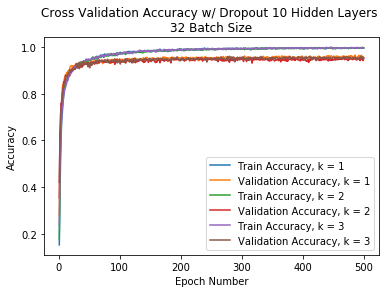

In [77]:


epoch_list = np.linspace(1,500, 500)

for i in cross_score:
    
    plt.plot(epoch_list, i[0])
    plt.plot(epoch_list, i[1])

plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy w/ Dropout {} Hidden Layers \n{} Batch Size'.format(hidden_layers, batch_size))
plt.legend(['Train Accuracy, k = 1', 'Validation Accuracy, k = 1', 
           'Train Accuracy, k = 2', 'Validation Accuracy, k = 2',
           'Train Accuracy, k = 3', 'Validation Accuracy, k = 3'])
# plt.savefig('cross_val2_hidden_layers{}_batchsize{}.png'.format(hidden_layers, batch_size))
plt.show()

In [129]:
batch_size = 512
nodes = 50
epochs = 500
learn_rate = 0.001
hidden_layers = 10
size = 6500

In [130]:
start = time.time()

modele = Sequential()
modele.add(Dense(nodes, activation='relu', input_shape=images_flatten[0].shape))

for i in range(0, hidden_layers):
    
    modele.add(Dense(nodes, activation='relu'))
    
modele.add(Dense(len(outputs[0]), activation='softmax'))

sgd = keras.optimizers.SGD(lr=learn_rate, momentum=0.5, nesterov=False)

modele.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', 'mse'])


i = images_flatten[:size]
o = outputs[:size]

x_train = i[:int(0.6*len(i))]
x_test = i[int(0.6*len(i)):int(0.8*len(i))]
x_validate = i[int(0.8*len(i)):len(i)]

y_train = o[:int(0.6*len(o))]
y_test = o[int(0.6*len(o)):int(0.8*len(o))]
y_validate = o[int(0.8*len(o)):len(o)]

h = modele.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_validate, y_validate))




Train on 3900 samples, validate on 1300 samples
Epoch 1/500
3900/3900 [==============================] - 3s 739us/step - loss: 3.3920 - acc: 0.0831 - mean_squared_error: 0.1017 - val_loss: 2.4826 - val_acc: 0.0923 - val_mean_squared_error: 0.0931
Epoch 2/500
3900/3900 [==============================] - 0s 30us/step - loss: 2.4219 - acc: 0.0903 - mean_squared_error: 0.0922 - val_loss: 2.3390 - val_acc: 0.0908 - val_mean_squared_error: 0.0910
Epoch 3/500
3900/3900 [==============================] - 0s 32us/step - loss: 2.3161 - acc: 0.0985 - mean_squared_error: 0.0904 - val_loss: 2.2820 - val_acc: 0.0977 - val_mean_squared_error: 0.0899
Epoch 4/500
3900/3900 [==============================] - 0s 32us/step - loss: 2.2638 - acc: 0.1151 - mean_squared_error: 0.0893 - val_loss: 2.2441 - val_acc: 0.1185 - val_mean_squared_error: 0.0890
Epoch 5/500
3900/3900 [==============================] - 0s 29us/step - loss: 2.2250 - acc: 0.1428 - mean_squared_error: 0.0884 - val_loss: 2.2136 - val_acc: 0

Epoch 42/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.6799 - acc: 0.8005 - mean_squared_error: 0.0297 - val_loss: 0.7794 - val_acc: 0.7685 - val_mean_squared_error: 0.0338
Epoch 43/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.6660 - acc: 0.8031 - mean_squared_error: 0.0291 - val_loss: 0.7726 - val_acc: 0.7723 - val_mean_squared_error: 0.0335
Epoch 44/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.6524 - acc: 0.8028 - mean_squared_error: 0.0286 - val_loss: 0.7543 - val_acc: 0.7762 - val_mean_squared_error: 0.0327
Epoch 45/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.6373 - acc: 0.8121 - mean_squared_error: 0.0279 - val_loss: 0.7454 - val_acc: 0.7785 - val_mean_squared_error: 0.0324
Epoch 46/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.6226 - acc: 0.8192 - mean_squared_error: 0.0273 - val_loss: 0.7347 - val_acc: 0.7831 - val_mean_squared_error: 0.0318
Epoch

3900/3900 [==============================] - 0s 30us/step - loss: 0.3667 - acc: 0.8928 - mean_squared_error: 0.0159 - val_loss: 0.5699 - val_acc: 0.8400 - val_mean_squared_error: 0.0243
Epoch 84/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.3644 - acc: 0.8923 - mean_squared_error: 0.0158 - val_loss: 0.5667 - val_acc: 0.8446 - val_mean_squared_error: 0.0239
Epoch 85/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.3612 - acc: 0.8941 - mean_squared_error: 0.0156 - val_loss: 0.5635 - val_acc: 0.8385 - val_mean_squared_error: 0.0238
Epoch 86/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.3547 - acc: 0.8956 - mean_squared_error: 0.0153 - val_loss: 0.5571 - val_acc: 0.8400 - val_mean_squared_error: 0.0238
Epoch 87/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.3530 - acc: 0.8974 - mean_squared_error: 0.0153 - val_loss: 0.5545 - val_acc: 0.8423 - val_mean_squared_error: 0.0236
Epoch 88/500
3900/

3900/3900 [==============================] - 0s 29us/step - loss: 0.2472 - acc: 0.9326 - mean_squared_error: 0.0105 - val_loss: 0.5143 - val_acc: 0.8523 - val_mean_squared_error: 0.0219
Epoch 125/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.2452 - acc: 0.9331 - mean_squared_error: 0.0105 - val_loss: 0.5115 - val_acc: 0.8538 - val_mean_squared_error: 0.0217
Epoch 126/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.2427 - acc: 0.9315 - mean_squared_error: 0.0104 - val_loss: 0.5109 - val_acc: 0.8523 - val_mean_squared_error: 0.0217
Epoch 127/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.2404 - acc: 0.9323 - mean_squared_error: 0.0102 - val_loss: 0.5095 - val_acc: 0.8462 - val_mean_squared_error: 0.0217
Epoch 128/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.2409 - acc: 0.9336 - mean_squared_error: 0.0102 - val_loss: 0.5111 - val_acc: 0.8538 - val_mean_squared_error: 0.0216
Epoch 129/500


3900/3900 [==============================] - 0s 30us/step - loss: 0.1740 - acc: 0.9528 - mean_squared_error: 0.0073 - val_loss: 0.4918 - val_acc: 0.8623 - val_mean_squared_error: 0.0205
Epoch 166/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.1731 - acc: 0.9549 - mean_squared_error: 0.0072 - val_loss: 0.4909 - val_acc: 0.8585 - val_mean_squared_error: 0.0206
Epoch 167/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.1715 - acc: 0.9554 - mean_squared_error: 0.0072 - val_loss: 0.4919 - val_acc: 0.8546 - val_mean_squared_error: 0.0205
Epoch 168/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.1705 - acc: 0.9559 - mean_squared_error: 0.0072 - val_loss: 0.4910 - val_acc: 0.8554 - val_mean_squared_error: 0.0206
Epoch 169/500
3900/3900 [==============================] - 0s 28us/step - loss: 0.1696 - acc: 0.9556 - mean_squared_error: 0.0071 - val_loss: 0.4976 - val_acc: 0.8615 - val_mean_squared_error: 0.0207
Epoch 170/500


3900/3900 [==============================] - 0s 29us/step - loss: 0.1249 - acc: 0.9705 - mean_squared_error: 0.0051 - val_loss: 0.4923 - val_acc: 0.8646 - val_mean_squared_error: 0.0198
Epoch 207/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.1241 - acc: 0.9726 - mean_squared_error: 0.0051 - val_loss: 0.4942 - val_acc: 0.8662 - val_mean_squared_error: 0.0197
Epoch 208/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.1242 - acc: 0.9700 - mean_squared_error: 0.0051 - val_loss: 0.4952 - val_acc: 0.8715 - val_mean_squared_error: 0.0197
Epoch 209/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.1226 - acc: 0.9718 - mean_squared_error: 0.0050 - val_loss: 0.4936 - val_acc: 0.8638 - val_mean_squared_error: 0.0199
Epoch 210/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.1219 - acc: 0.9726 - mean_squared_error: 0.0050 - val_loss: 0.5031 - val_acc: 0.8623 - val_mean_squared_error: 0.0203
Epoch 211/500


3900/3900 [==============================] - 0s 30us/step - loss: 0.0906 - acc: 0.9808 - mean_squared_error: 0.0035 - val_loss: 0.5108 - val_acc: 0.8677 - val_mean_squared_error: 0.0198
Epoch 248/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.0929 - acc: 0.9797 - mean_squared_error: 0.0037 - val_loss: 0.5038 - val_acc: 0.8638 - val_mean_squared_error: 0.0193
Epoch 249/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0889 - acc: 0.9810 - mean_squared_error: 0.0035 - val_loss: 0.5066 - val_acc: 0.8662 - val_mean_squared_error: 0.0193
Epoch 250/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0882 - acc: 0.9815 - mean_squared_error: 0.0035 - val_loss: 0.5048 - val_acc: 0.8692 - val_mean_squared_error: 0.0192
Epoch 251/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.0876 - acc: 0.9815 - mean_squared_error: 0.0034 - val_loss: 0.5048 - val_acc: 0.8669 - val_mean_squared_error: 0.0192
Epoch 252/500


3900/3900 [==============================] - 0s 34us/step - loss: 0.0656 - acc: 0.9869 - mean_squared_error: 0.0024 - val_loss: 0.5204 - val_acc: 0.8662 - val_mean_squared_error: 0.0192
Epoch 289/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0643 - acc: 0.9872 - mean_squared_error: 0.0024 - val_loss: 0.5184 - val_acc: 0.8754 - val_mean_squared_error: 0.0189
Epoch 290/500
3900/3900 [==============================] - 0s 34us/step - loss: 0.0640 - acc: 0.9877 - mean_squared_error: 0.0024 - val_loss: 0.5174 - val_acc: 0.8723 - val_mean_squared_error: 0.0187
Epoch 291/500
3900/3900 [==============================] - 0s 31us/step - loss: 0.0636 - acc: 0.9879 - mean_squared_error: 0.0023 - val_loss: 0.5199 - val_acc: 0.8731 - val_mean_squared_error: 0.0190
Epoch 292/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0635 - acc: 0.9872 - mean_squared_error: 0.0023 - val_loss: 0.5190 - val_acc: 0.8738 - val_mean_squared_error: 0.0189
Epoch 293/500


3900/3900 [==============================] - 0s 30us/step - loss: 0.0474 - acc: 0.9918 - mean_squared_error: 0.0016 - val_loss: 0.5386 - val_acc: 0.8754 - val_mean_squared_error: 0.0190
Epoch 330/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0471 - acc: 0.9918 - mean_squared_error: 0.0016 - val_loss: 0.5378 - val_acc: 0.8762 - val_mean_squared_error: 0.0189
Epoch 331/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0469 - acc: 0.9921 - mean_squared_error: 0.0016 - val_loss: 0.5374 - val_acc: 0.8777 - val_mean_squared_error: 0.0187
Epoch 332/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.0469 - acc: 0.9915 - mean_squared_error: 0.0016 - val_loss: 0.5373 - val_acc: 0.8769 - val_mean_squared_error: 0.0189
Epoch 333/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0463 - acc: 0.9931 - mean_squared_error: 0.0015 - val_loss: 0.5395 - val_acc: 0.8777 - val_mean_squared_error: 0.0189
Epoch 334/500


3900/3900 [==============================] - 0s 29us/step - loss: 0.0356 - acc: 0.9954 - mean_squared_error: 0.0011 - val_loss: 0.5595 - val_acc: 0.8777 - val_mean_squared_error: 0.0190
Epoch 371/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0351 - acc: 0.9959 - mean_squared_error: 0.0011 - val_loss: 0.5597 - val_acc: 0.8808 - val_mean_squared_error: 0.0188
Epoch 372/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0353 - acc: 0.9956 - mean_squared_error: 0.0011 - val_loss: 0.5593 - val_acc: 0.8769 - val_mean_squared_error: 0.0189
Epoch 373/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.0348 - acc: 0.9959 - mean_squared_error: 0.0011 - val_loss: 0.5606 - val_acc: 0.8746 - val_mean_squared_error: 0.0190
Epoch 374/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0349 - acc: 0.9956 - mean_squared_error: 0.0011 - val_loss: 0.5584 - val_acc: 0.8777 - val_mean_squared_error: 0.0188
Epoch 375/500


3900/3900 [==============================] - 0s 30us/step - loss: 0.0275 - acc: 0.9969 - mean_squared_error: 7.7244e-04 - val_loss: 0.5772 - val_acc: 0.8792 - val_mean_squared_error: 0.0189
Epoch 411/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0273 - acc: 0.9972 - mean_squared_error: 7.5640e-04 - val_loss: 0.5810 - val_acc: 0.8808 - val_mean_squared_error: 0.0189
Epoch 412/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0275 - acc: 0.9977 - mean_squared_error: 7.6619e-04 - val_loss: 0.5780 - val_acc: 0.8808 - val_mean_squared_error: 0.0189
Epoch 413/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.0269 - acc: 0.9974 - mean_squared_error: 7.4479e-04 - val_loss: 0.5791 - val_acc: 0.8831 - val_mean_squared_error: 0.0188
Epoch 414/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0268 - acc: 0.9974 - mean_squared_error: 7.3780e-04 - val_loss: 0.5798 - val_acc: 0.8815 - val_mean_squared_error: 0

3900/3900 [==============================] - 0s 30us/step - loss: 0.0218 - acc: 0.9977 - mean_squared_error: 5.5691e-04 - val_loss: 0.5920 - val_acc: 0.8831 - val_mean_squared_error: 0.0188
Epoch 451/500
3900/3900 [==============================] - 0s 30us/step - loss: 0.0218 - acc: 0.9977 - mean_squared_error: 5.6437e-04 - val_loss: 0.5920 - val_acc: 0.8846 - val_mean_squared_error: 0.0187
Epoch 452/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0217 - acc: 0.9977 - mean_squared_error: 5.6384e-04 - val_loss: 0.5906 - val_acc: 0.8792 - val_mean_squared_error: 0.0187
Epoch 453/500
3900/3900 [==============================] - 0s 29us/step - loss: 0.0214 - acc: 0.9977 - mean_squared_error: 5.5313e-04 - val_loss: 0.5927 - val_acc: 0.8862 - val_mean_squared_error: 0.0187
Epoch 454/500
3900/3900 [==============================] - 0s 28us/step - loss: 0.0215 - acc: 0.9977 - mean_squared_error: 5.5803e-04 - val_loss: 0.5913 - val_acc: 0.8792 - val_mean_squared_error: 0

3900/3900 [==============================] - 0s 32us/step - loss: 0.0176 - acc: 0.9982 - mean_squared_error: 4.4388e-04 - val_loss: 0.6035 - val_acc: 0.8846 - val_mean_squared_error: 0.0187
Epoch 491/500
3900/3900 [==============================] - 0s 35us/step - loss: 0.0174 - acc: 0.9982 - mean_squared_error: 4.3660e-04 - val_loss: 0.6026 - val_acc: 0.8823 - val_mean_squared_error: 0.0187
Epoch 492/500
3900/3900 [==============================] - 0s 35us/step - loss: 0.0174 - acc: 0.9982 - mean_squared_error: 4.3689e-04 - val_loss: 0.6037 - val_acc: 0.8831 - val_mean_squared_error: 0.0188
Epoch 493/500
3900/3900 [==============================] - 0s 35us/step - loss: 0.0173 - acc: 0.9982 - mean_squared_error: 4.3179e-04 - val_loss: 0.6034 - val_acc: 0.8862 - val_mean_squared_error: 0.0187
Epoch 494/500
3900/3900 [==============================] - 0s 31us/step - loss: 0.0171 - acc: 0.9982 - mean_squared_error: 4.2989e-04 - val_loss: 0.6067 - val_acc: 0.8854 - val_mean_squared_error: 0

In [131]:
print(time.time() - start)
print(h.history['val_acc'][len(h.history['val_acc']) - 1])

62.2937650680542


0.8830769168413602